# 2020 Diffusie werkcollege opdracht
***

## Datum: 4 maart 2020
## Hoofdstuk: 5
## Groep nummer: 31
***
## Student 1
    naam: Julian van Doorn
    Studentnr: s2518074

## Student 2
    naam: Jibbe Reuver
    Studentnr: s2367327


In [1]:
from __future__ import division

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


# Opgave 5.5a

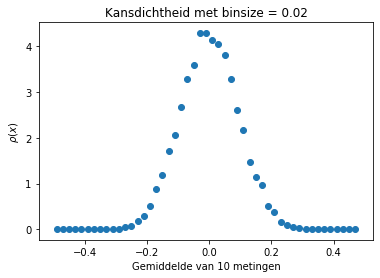

In [2]:
sample_size = 10
n_experiments = 5000

bin_size = 0.02

results = np.random.random((n_experiments, sample_size)) - 0.5
results_mean = np.mean(results, axis=1)

bins = np.arange(-0.5, 0.5, bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies, grenzen = np.histogram(results_mean, bins)
kansdichtheid = frequencies / (bin_size * n_experiments)

plt.scatter(centra, kansdichtheid)

plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel(f'Gemiddelde van {sample_size} metingen')
plt.ylabel(r'$\rho(x)$')
plt.show()

# Ogpave 5.5b

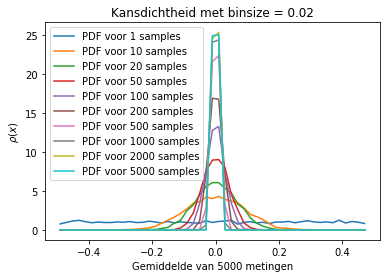

In [3]:
sample_sizes = [1, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

for sample_size in sample_sizes:
    results = np.random.random((n_experiments, sample_size)) - 0.5
    results_mean = np.mean(results, axis=1)

    frequencies, grenzen = np.histogram(results_mean, bins)
    kansdichtheid = frequencies / (bin_size * n_experiments)

    plt.plot(centra, kansdichtheid, label=f'PDF voor {sample_size} samples')

plt.title(f'Kansdichtheid met binsize = {bin_size}')
plt.xlabel(f'Gemiddelde van {sample_size} metingen')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.show()

# Opgave 5.5c

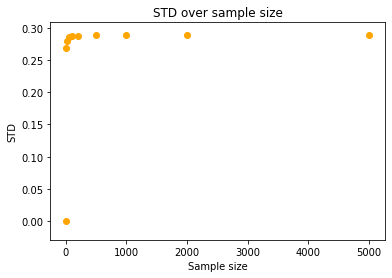

In [4]:
for sample_size in sample_sizes:
    results = np.random.random((n_experiments, sample_size)) - 0.5
    results_std = np.std(results, axis=1)
    result_std = np.mean(results_std)
    
    plt.scatter(sample_size, result_std, color='orange')

plt.title('STD over sample size')
plt.xlabel('Sample size')
plt.ylabel('STD')
plt.show()

# Opgave 5.5d
Wanneer je maar een sample hebt kan deze niet afwijken van zichzelf. De STD is dan 0.

# Opgave 5.5e

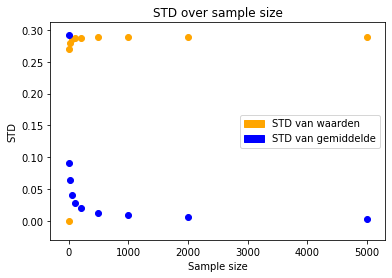

In [5]:
import matplotlib.patches as mpatches

for sample_size in sample_sizes:
    results = np.random.random((n_experiments, sample_size)) - 0.5
    results_std = np.std(results, axis=1)
    result_std = np.mean(results_std)
    
    plt.scatter(sample_size, result_std, color='orange')

for sample_size in sample_sizes:
    results = np.random.random((n_experiments, sample_size)) - 0.5
    results_mean = np.mean(results, axis=1)
    results_mean_std = np.std(results_mean, axis=0)
    
    plt.scatter(sample_size, results_mean_std, color='blue')

orange_patch = mpatches.Patch(color='orange', label='STD van waarden')
blue_patch = mpatches.Patch(color='blue', label='STD van gemiddelde')
    
plt.title('STD over sample size')
plt.xlabel('Sample size')
plt.ylabel('STD')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

# Opgave 5.5f
Hoe meer metingen je doet hoe dichter je bij het ware gemiddelde komt te liggen. Dit houdt in dat de STD van de gemiddelde waarde dus steeds kleiner wordt omdat alle experimenten in de buurt van het ware gemiddelde komen te liggen.

# Opgave 5.6a

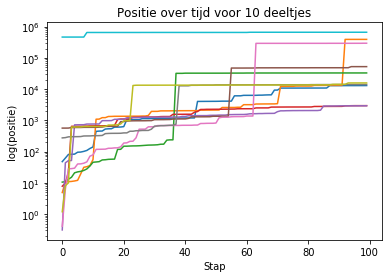

In [6]:
from scipy.stats import levy

n_particles = 1000
n_steps = 100

results = levy.rvs(size=(n_particles, n_steps))
positions = np.cumsum(results, axis=1)

plt.semilogy(positions.T[:,:10])
plt.title('Positie over tijd voor 10 deeltjes')
plt.xlabel('Stap')
plt.ylabel('log(positie)')
plt.show()

# Opgave 5.6b

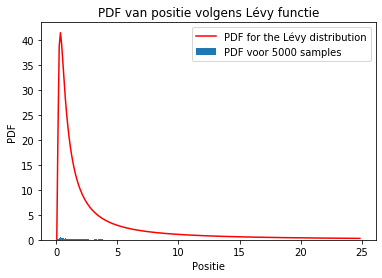

In [7]:
bin_size = 0.1

bins = np.arange(0, 25, bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies, grenzen = np.histogram(positions[:,0], bins)
kansdichtheid = frequencies / (bin_size * n_particles)


plt.bar(centra, kansdichtheid, label=f'PDF voor {sample_size} samples', width=bin_size)
plt.plot(centra, levy.pdf(centra) * 90, label='PDF for the Lévy distribution', color='red')

plt.title('PDF van positie volgens Lévy functie')
plt.ylabel('PDF')
plt.xlabel('Positie')
plt.legend()
plt.show()

# Opgave 5.6c

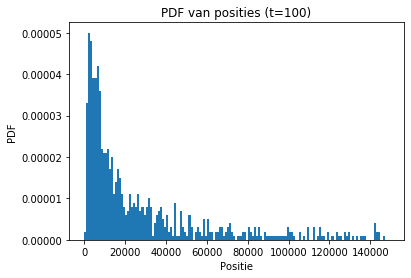

In [8]:
bin_size = 1000

bins = np.arange(0, 150000, bin_size)
centra = bins[:-1] + 0.5 * bin_size

frequencies, grenzen = np.histogram(positions[:,-1], bins)
kansdichtheid = frequencies / (bin_size * n_particles)

plt.bar(centra, kansdichtheid, width=bin_size)
plt.title('PDF van posities (t=100)')
plt.ylabel('PDF')
plt.xlabel('Positie')
plt.show()

# Opgave 5.6d

In [9]:
M1 = np.sum(kansdichtheid * centra) * bin_size
print(f'Gemiddelde m.b.v. np.mean(): {np.mean(positions[:,-1]):.0f}')
print(f'Gemiddelde m.b.v. 1e moment: {M1:.0f}')

Gemiddelde m.b.v. np.mean(): 3084001
Gemiddelde m.b.v. 1e moment: 21706


Het gemiddelde is eerlijkere benadering in dit geval. Dit komt doordat bij het gemiddelde je alle waardes meeneemt. Bij het 1e moment zijn we gelimiteerd door onze bin_range. Bij een grote bin_range duurt het computeren te lang. We hebben het eerste moment nu benaderd door:
$$\langle x \rangle = \sum x \cdot p(x) = \Delta x \sum x \cdot \rho(x)$$

Echter is het wel zo dat ons eerste moment dichter bij de piek zit dan ons gemiddelde. Afhankelijk van of je dus alle uitschieters mee wil nemen kan het eerste moment dus beter zijn. Verder zien we dat als we de bin_range groter maken dat ons eerste moment dichter bij het gemiddelde komt te liggen.

# Opgave 5.6e

In [10]:
M2 = np.sum(kansdichtheid * np.square(centra)) * bin_size
var = M2 - M1**2
print(f'2e moment: {M2:.0f}')
print(f'variantie: {var:.0f}')
print(f'std: {np.sqrt(var):.0f}')

2e moment: 1422838250
variantie: 951709520
std: 30850


Volgens https://nl.wikipedia.org/wiki/Normale_verdeling#Vuistregel moet bij een normaalverdeling valt 0.1% buiten 3$\sigma$. Doordat het gemiddelde zeer ver van de piek af ligt durven wij met zekerheid te zeggen dat meer dan 0.1% buiten de 3$\sigma$ valt. Hiermee is het dus geen normaalverdeling. Verder kan het argument dat de verdeling niet symetrisch is worden aangedragen.

# Opgave 5.6f

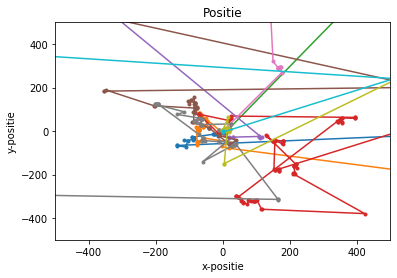

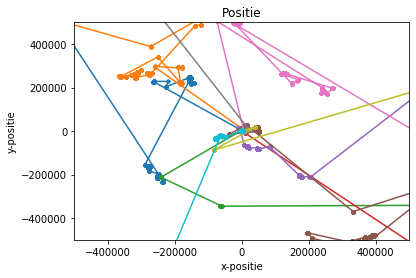

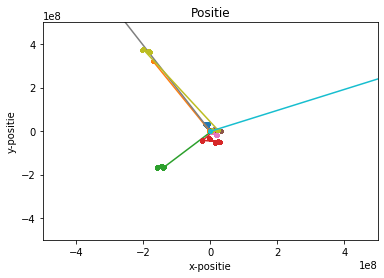

In [11]:
n_particles = 10
n_steps = 10000

directions = np.random.random((n_particles, n_steps)) * np.pi * 2
lengths = levy.rvs(size=(n_particles, n_steps))

x_step = lengths * np.cos(directions)
y_step = lengths * np.sin(directions)

x_positions = np.cumsum(x_step, axis=1)
y_positions = np.cumsum(y_step, axis=1)

plt.plot(x_positions.T, y_positions.T, marker='.')
plt.title('Positie')
plt.xlabel('x-positie')
plt.ylabel('y-positie')
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.show()

plt.plot(x_positions.T, y_positions.T, marker='.')
plt.title('Positie')
plt.xlabel('x-positie')
plt.ylabel('y-positie')
plt.xlim(-500000, 500000)
plt.ylim(-500000, 500000)
plt.show()

plt.plot(x_positions.T, y_positions.T, marker='.')
plt.title('Positie')
plt.xlabel('x-positie')
plt.ylabel('y-positie')
plt.xlim(-500000000, 500000000)
plt.ylim(-500000000, 500000000)
plt.show()

# Opgave 5.6g
Wat gebeurt is dat er telkens hele kleine stappen worden genomen, veel punten liggen dus op elkaar. Vervolgens wordt er een grote stap genomen en wordt daar een nieuwe klodder punten gevormd.

# Opgave 5.6h
Bij een random walk blijf je in een klein gebied. Dit houdt dus in dat als daar geen of weinig eten is dat je ook geen eten vindt. Bij een Levy flight "doorzoek" je een gebied en ga je vervolgens naar een ander gebied. Hierdoor kan je dus beter naar eten zoeken.

# Opgave 5.7a

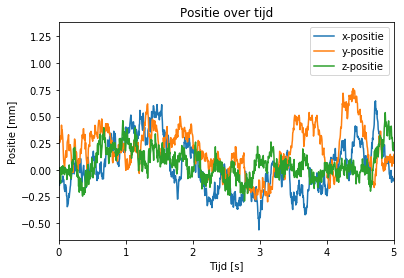

In [12]:
coords = np.loadtxt('data/MTdata5.txt')

plt.plot(coords[:, 0], coords[:, 1], label='x-positie')
plt.plot(coords[:, 0], coords[:, 2], label='y-positie')
plt.plot(coords[:, 0], coords[:, 3], label='z-positie')
plt.title('Positie over tijd')
plt.ylabel('Positie [mm]')
plt.xlabel('Tijd [s]')
plt.xlim(0, 5)
plt.legend()
plt.show()

# Opgave 5.7b
Nee, het patroon herhaalt zich, het is een oscillerend patroon en dus niet random. Oftewel geen vrije diffusie.

# Opgave 5.7c

In [13]:
t_smallest = np.min(np.diff(coords[:, 0]))
print(f'Kleinste tijdstap: {t_smallest:.3f}')

Kleinste tijdstap: 0.005


# Opgave 5.7d

In [14]:
x_MSD = np.mean(np.square(np.diff(coords[:, 1])))
y_MSD = np.mean(np.square(np.diff(coords[:, 2])))
z_MSD = np.mean(np.square(np.diff(coords[:, 3])))

print(f'MSD van x: {x_MSD:.4f}; MSD van y: {y_MSD:.4f}; MSD van z: {z_MSD:.4f};')

MSD van x: 0.0024; MSD van y: 0.0026; MSD van z: 0.0041;


De waarde van de MSD van Z is relatief veel hoger. We zien ook in de grafiek dat hij veel sneller oscilleert.

# Opgave 5.7e

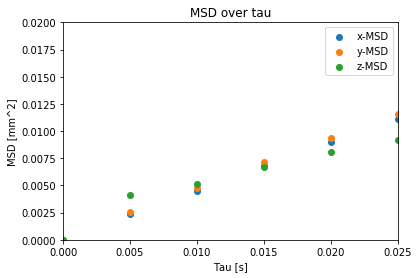

In [15]:
n_steps = 5000

MSD_array = np.zeros(4 * n_steps).reshape(n_steps, 4)
for n in range(0, n_steps):
    MSD_array[n, 0] = n * 0.005
    MSD_array[n, 1] = np.mean(np.square(coords[n:, 1] - coords[:len(coords[:,0]) - n, 1]))
    MSD_array[n, 2] = np.mean(np.square(coords[n:, 2] - coords[:len(coords[:,0]) - n, 2]))
    MSD_array[n, 3] = np.mean(np.square(coords[n:, 3] - coords[:len(coords[:,0]) - n, 3]))
    
plt.scatter(MSD_array[:, 0], MSD_array[:, 1], label='x-MSD')
plt.scatter(MSD_array[:, 0], MSD_array[:, 2], label='y-MSD')
plt.scatter(MSD_array[:, 0], MSD_array[:, 3], label='z-MSD')

plt.title('MSD over tau')
plt.ylabel('MSD [mm^2]')
plt.xlabel('Tau [s]')
plt.xlim(0, 0.025)
plt.ylim(0,0.02)
plt.legend()
plt.show()

# Opgave 5.7f

Slope X: 0.43609357242563784; Intercept X: 0.0002122503880478601
Slope Y: 0.4516836899575575; Intercept Y: 0.0003039054086624894
Slope Z: 0.2617975506149143; Intercept Z: 0.0026962989980683595


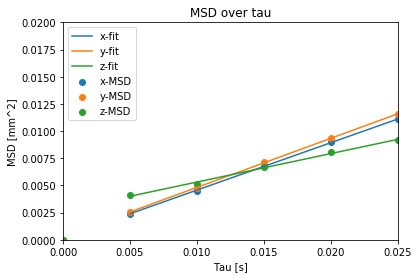

In [16]:
from scipy import stats

slopex, interceptx, r_value, p_value, std_err = stats.linregress(MSD_array[1:6, 0], MSD_array[1:6, 1])
slopey, intercepty, r_value, p_value, std_err = stats.linregress(MSD_array[1:6, 0], MSD_array[1:6, 2])
slopez, interceptz, r_value, p_value, std_err = stats.linregress(MSD_array[1:6, 0], MSD_array[1:6, 3])

plt.plot(MSD_array[1:6, 0], slopex * MSD_array[1:6, 0] + interceptx, label='x-fit')
plt.plot(MSD_array[1:6, 0], slopey * MSD_array[1:6, 0] + intercepty, label='y-fit')
plt.plot(MSD_array[1:6, 0], slopez * MSD_array[1:6, 0] + interceptz, label='z-fit')

print(f'Slope X: {slopex}; Intercept X: {interceptx}')
print(f'Slope Y: {slopey}; Intercept Y: {intercepty}')
print(f'Slope Z: {slopez}; Intercept Z: {interceptz}')

plt.scatter(MSD_array[:, 0], MSD_array[:, 1], label='x-MSD')
plt.scatter(MSD_array[:, 0], MSD_array[:, 2], label='y-MSD')
plt.scatter(MSD_array[:, 0], MSD_array[:, 3], label='z-MSD')

plt.title('MSD over tau')
plt.ylabel('MSD [mm^2]')
plt.xlabel('Tau [s]')
plt.xlim(0, 0.025)
plt.ylim(0,0.02)
plt.legend()
plt.show()

# Opgave 5.7g

In [17]:
print(f'Onzekerheid X: {interceptx * 10**6} nm')
print(f'Onzekerheid Y: {intercepty * 10**6} nm')
print(f'Onzekerheid Z: {interceptz * 10**6} nm')

Onzekerheid X: 212.2503880478601 nm
Onzekerheid Y: 303.90540866248944 nm
Onzekerheid Z: 2696.2989980683597 nm


Gebruikt wordt licht van rond de 400nm. De onzerkheid daarbij is de helft ongeveer, dus ongeveer 200nm. Dit komt vermoedelijk overeen met de onzekerheid in X en Y. De grotere onzekerheid in Z wordt mogelijk verklaart omdat diepte moeilijker is te zien.

# Opgave 5.7h
Zoals de opgave zegt nemen we maar twee dimensies. We gebruiken dan $MSD = 2nDt \Longrightarrow D = \frac{MSD}{2nt} = \frac{0.44 \cdot 10^{-12}}{4 \cdot 0.005} = 0.022$. De MSD is berekend door het gemiddelde van de X en Y slope te nemen.

Hieruit volgt dat $R = \frac{K_b*T}{D\pi \mu * 6} = 9.8 \cdot 10^{-12}$m.

# Opgave 5.7i

Er ontstaat steeds meer chaos. Bij vrije diffusie zien we meer eentonigheid waar het veelal rond een gemiddelde. Hier lijkt het vrij groote afwijkingen te hebben doordat het lang een kant op blijft gaan. Hierdoor kan je het op het begin lineair benaderen.